# Second-Order Differential Equations

:::{note} 
In this section, we will start with some general theory of $n$th-order linear differential equations to motivate the techniques used for solving second-order differential equations. Second-order differential equations play a critical role in mathematical physics and engineering disciplines due to their ubiquity in modeling natural phenomena. They are differential equations in which the highest order derivative is of the second order. Specifically, a second-order differential equation can be written as $\frac{d^2x}{dt^2} = f(t, x, \frac{dx}{dt})$ where $x$ is the unknown function we are interested in, $t$ is the independent variable, $\frac{dx}{dt}$ is the first derivative of $x$, and $\frac{d^2x}{dt^2}$ is the second derivative of $x$.

Examples of the practical applications of second-order differential equations include but are not limited to: modeling the motion of a spring (harmonic oscillator), predicting the population dynamics in ecology, and describing the behavior of electric circuits. They are also widely used in the fields of physics, economics, and engineering to create mathematical models of real-world situations. One reason for the importance of second-order equations is that if $x(t)$ represents the position of an object at time $t$, then $x'(t)$ is its instantaneous velocity and $x''(t)$ is its acceleration; thus, real-world problems from the physical sciences often lead to equations of this type.

Solving second-order differential equations can be quite complex and may involve techniques such as characteristic equations, method of undetermined coefficients, and variation of parameters, among others. The nature of the solution can widely vary depending on the form of the equation. For instance, solutions can be real or complex, periodic or exponential, and convergent or divergent. Some special types of second-order differential equations, like the Cauchy-Euler equation or the Bessel's equation, have their own dedicated methods of solutions due to their unique structure.

As we explore the world of second-order differential equations, we uncover a variety of mathematical landscapes with significant implications for understanding the world around us. Through these equations, we can dive deep into the patterns and behaviors that underscore numerous phenomena, both natural and man-made.
:::

Recall that a general linear $n$th-order initial-value problem is of the form 

$$
a_n(x)y^{(n)}(x)+a_{n-1}y^{(n-1)}(x) + \dots + a_1(x)y'(x) + a_0(x)y(x)=g(x)
$$ 

where $y(x_0)=y_0$, $y'(x_0)=y_1$, $\dots$, $y{(n-1)}(x_0)=y_{n-1}$. Recall that the number of initial conditions must match the order of the differential equation and they must have the same input $x_0$. We call a linear differential equation **homogeneous** if $g(x)=0$, or in other words, if it can be written as 

$$
a_n(x)y^{(n)}(x)+a_{n-1}y^{(n-1)}(x) + \dots + a_1(x)y'(x) + a_0(x)y(x)=0.
$$

```{index} superposition principle
```

### General Theory

One of the most important principles for homogeneous equations is the **Superposition Principle** which states that if $y_1, y_2 \dots, y_n$ are solutions to the homogeneous linear $n$th-order differential equation $a_n(x)y^{(n)}(x)+a_{n-1}y^{(n-1)}(x) + \dots + a_1(x)y'(x) + a_0(x)y(x)=0$ on an interval $I$. Then the linear combination $y(x)= c_1y_1(x) + c_2y_2(x) + \dots + c_ny_n(x)$ where $c_k$ is an arbitrary constant for each $k$ is also a solution on $I$. In other words, we can build new solutions from existing solutions. This idea is critical in solving second-order differential equations.

Some nice consequences of the Superposition Principle are
1. If $y$ is a solution to a homogeneous differential equation, then so is $cy$ for any constant $c$. In other words, we can scale every solution to produce another solution.

2. $y=0$ is a solution to every homogeneous differential equation. This comes from setting $c_k=0$ for all $k$.

:::{admonition} Example

Consider the differential equation $y''-4y=0$. Verify that $y(x)=e^{2x}$ and $y(x)=e^{-2x}$. Use the Superposition Principle to conclude that $y(x) = Ae^{2x}+Be^{-2x}$ is also a solution for any constants $A$ and $B$.
:::

In [2]:
# Check that y=e^{2x} is a solution 
import sympy as sym

x = sym.Symbol('x')
#Define f(x)
f = sym.exp(2*x)
print('This is the function f(x):', f)

#Define f'(x)
dfdx = sym.diff(f)
print('This is the derivative of f(x):', dfdx)

#Define f''(x)
dfdxx = sym.diff(dfdx)
print('This is the second derivative of f(x):', dfdxx)

#See if f(x) is a solution to the differential equation. If it outputs True, f(x) is a solution.
dfdxx-4*f == 0

This is the function f(x): exp(2*x)
This is the derivative of f(x): 2*exp(2*x)
This is the second derivative of f(x): 4*exp(2*x)


True

In [1]:
# Check that y=e^{-2x} is a solution 
import sympy as sym

x = sym.Symbol('x')
#Define f(x)
f = sym.exp(-2*x)
print('This is the function f(x):', f)

#Define f'(x)
dfdx = sym.diff(f)
print('This is the derivative of f(x):', dfdx)

#Define f''(x)
dfdxx = sym.diff(dfdx)
print('This is the second derivative of f(x):', dfdxx)

#See if f(x) is a solution to the differential equation. If it outputs True, f(x) is a solution.
dfdxx-4*f == 0

This is the function f(x): exp(-2*x)
This is the derivative of f(x): -2*exp(-2*x)
This is the second derivative of f(x): 4*exp(-2*x)


True

The Superposition Principle tells us that we can build new solutions by taking linear combinations of known solutions. This means that $y(x)=Ae^{2x}+Be^{-2x}$ is a solution since $y(x)=e^{2x}$ and $y(x)=e^{-2x}$ are known solutions.

```{index} linear homogeneous differential equations with constant coefficients

```

### Linear Homogeneous Differential Equations with Constant Coefficients

We expect solutions of an $n$th-order linear homogeneous differential equation with constant coefficients $a_nx^{(n)} + a_{n-1}x^{(n-1)} + \dots + a_1x' + a_0x = 0$ to be of the form $x(t) = e^{kt}$ for some constant $k$. We also know that if $x_1(t)=e^{k_1t}$ and $x_2(t) = e^{k_2t}$ are both solutions, then $x(t) = c_1e^{k_1t}+c_2e^{k_2t}$, where $c_1$ and $c_2$ are any constants, is also a solution by the Superposition Principle.

:::{admonition} Motivating Example

Find all solutions to $x'' - 7x' +12x =0$.

Suppose $x(t)=e^{kt}$ is a solution. This means it satisfies our differential equation. Since $x'(t) = ke^{kt}$ and $x''(t) = k^2e^{kt}$, we know 

$x'' - 7x' +12x = k^2e^{kt} -7ke^{kt}+12e^{kt} = e^{kt}(k^2-7k+12)=0$.

Since $e^{kt} \neq 0$, we know that $k^2-7k+12=0$ when $e^{kt}$ is a solution. We call the equation $k^2-7k+12=0$ the **characteristic equation** of the differential equation. Solving the characteristic equation gives $k^2-7k+12=(k-3)(k-4)=0$. Thus, $k=3$ or $k=4$ meaning that $x(t)=e^{3t}$ and $x(t)=e^{4t}$ are both solutions to the differential equation. Moreover, by the Superposition Principle, $x(t) = c_1e^{3t} + c_2e^{4t}$ are also solutions for all constants $c_1$ and $c_2$. 

So a natural question is did we find all solutions? We found an infinite family of solutions, but how do we know there are not any other solutions? We will be exploring this question next.
:::

A set of functions is said to be **linearly dependent** if one function can be written as a linear combination of the others. This means that a set of function $\{f_1(t), f_2(t), \dots, f_n(t)\}$ is linearly dependent if there exist constants $c_1, c_2, \dots, c_n$ **not all zero** such that $c_1f_1(t)+c_2f_2(t)+\dots+c_nf_n(t)=0$. A set of functions is said to be **linearly independent** if the only way $c_1f_1(t)+c_2f_2(t)+\dots+c_nf_n(t)=0$ is true is if all of the $c_i$ are zero.

:::{admonition} Example
- $\{1, t, 4t+2\}$ is a linearly dependent set of functions because 2(1)+4(t)-(4t+2)=0.
- $\{1, x, x^2\}$ is a linearly independent set of functions because $c_1+c_2x+c_3x^2=0$ only when $c_1=c_2=c_3=0$.
:::

It turns out that this idea of a linearly dependent/independent set of functions allows us to precisely answer the earlier question of "Did we find all of the solutions?" through the following theorem.

:::::{admonition} Theorem
:class: tip
Every $n$th-order linear homogeneous equation has a set of $n$ linearly independent solutions; this is called a **fundamental set of solutions**. Let $x_1, x_2, \dots, x_n$ be a fundamental set of solutions of an $n$th-order linear homogeneous equation. By the Superposition Principle, $x(t) = c_1x_1(t)+c_2x_2(t)+\dots+c_nx_n(t)$ is also a solutions; we call this the **general solution**.
:::::

Let's now return to our motivating example.

:::{admonition} Motivating Example (continued)

Find all solutions to $x'' - 7x' +12x =0$.

Recall previously we found that $x(t)=e^{3t}$ and $x(t)=e^{4t}$ are both solutions to the differential equation. Moreover, by the Superposition Principle, $x(t) = c_1e^{3t} + c_2e^{4t}$ are also solutions for all constants $c_1$ and $c_2$. 

Since this differential equation is second-order, we know that the fundamental set of solutions contains two linearly independent solutions. Notice that $e^{3t}$ and $e^{4t}$ are linearly independent as $c_1e^{3t}+c_2e^{4t}=0$ only when $c_1=c_2=0$. This means that $\{e^{3t},e^{4t}\}$ *is* the fundamental set of solutions and thus, the general solution $x(t)= c_1e^{3t} + c_2e^{4t}$ does capture *all* solutions of this differential equation.
:::

We will now look at two other examples that will ultimately motivate our strategy for these second-order differential equations.

:::{admonition} Example

Find all solutions to $x'' - 6x' +9x =0$.

Suppose $x(t)=e^{kt}$ is a solution. This means it satisfies our differential equation. Since $x'(t) = ke^{kt}$ and $x''(t) = k^2e^{kt}$, we know 

$x'' - 6x' +9x = k^2e^{kt} -6ke^{kt}+9e^{kt} = e^{kt}(k^2-6k+9)=0$.

Since $e^{kt} \neq 0$, we know that $k^2-6k+9=0$ when $e^{kt}$ is a solution. Thus, $k^2-6k+9=0$ is the **characteristic equation** of this differential equation. Solving the characteristic equation gives $k^2-6k+9=(k-3)(k-3)=0$. Thus, $k=3$ meaning that $x(t)=e^{3t}$ is a solution to the differential equation. But, since this differential equation is second-order, we know that the fundamental set of solutions contains two linearly independent solutions. This means we are missing one. 

We will now guess a second solution that is linearly independent from the first solution. Our guess is $y(t)=te^{3t}$. The motivation for the guess is that we expect the solution to look "like" $x(t)=e^{3t}$ and be linearly independent from it. But now we need to verify that our guess is actually a solution. If $y(t)=te^{3t}$ is a solution, then it satisfies our differential equation. Since $y'(t) = 3te^{3t}+e^{3t}$ and $y''(t) = 9te^{3t}+6e^{3t}$, we know  $x'' - 6x' +9x = (9te^{3t}+6e^{3t}) -6(3te^{3t}+e^{3t})+9(te^{3t}) =0$. Thus, $y(t)=te^{3t}$ is a solution.

This means that $\{e^{3t},te^{3t}\}$ *is* the fundamental set of solutions and thus, the general solution $x(t)= c_1e^{3t} + c_2te^{3t}$ does capture *all* solutions of this differential equation.
:::

:::{admonition} Example

Find the *real-valued* general solution to $x'' +9x =0$.

Suppose $x(t)=e^{kt}$ is a solution. This means it satisfies our differential equation. Since $x'(t) = ke^{kt}$ and $x''(t) = k^2e^{kt}$, we know 

$x''+9x = k^2e^{kt} +9e^{kt} = e^{kt}(k^2+9)=0$.

Since $e^{kt} \neq 0$, we know that $k^2+9=0$ when $e^{kt}$ is a solution. Thus, $k^2+9=0$ is the **characteristic equation** of this differential equation. Solving the characteristic equation gives $k^2+9=0$. Thus, $k=\pm3i$ meaning that $x_1(t)=e^{3it}$ and $x_2(t)=e^{-3it}$ are solutions to the differential equation. But, these are not *real-valued* solutions. 

Recall Euler's formula which says that $e^{i\theta} = \cos(\theta)+i\sin(\theta)$. Using Euler's formula we can rewrite $x_1(t)=e^{3it} = \cos(3t)+i\sin(3t)$ and $x_2(t)=e^{-3it} = \cos(-3t)+i\sin(-3t)$. Moreover, since cosine is an even function, we know $\cos(-\theta) = \cos(\theta)$ and since sine is an odd function, we know $\sin(-\theta) = -\sin(\theta)$. Thus, $x_2(t) = \cos(3t)-i\sin(3t)$.

Recall that any linear combination of $x_1, x_2$ is also a solution by the superposition principle. This means that $y_1(t) = \frac{x_1(t)+x_2(t)}{2} = \cos(3t)$ is a solution *and* $y_2(t) = \frac{x_1(t)-x_2(t)}{2i} = \sin(3t)$ is also a solution. Note that $y_1(t)$ and $y_2(t)$ are still linearly independent and they are real-vlaued.

This means that $\{\cos(3t),\sin(3t)\}$ *is* the fundamental set of solutions and thus, the general solution $x(t)= c_1\cos(3t) + c_2\sin(3t)$ does capture *all* solutions of this differential equation.

:::

:::{admonition} Summary 

Consider the differential equation $ax''+bx'+cx=0$. 

1. The characteristic equation is $ak^2+bk+c=0$.

2. The possible solutions to the characteristic equation are $k = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$. There are three cases for what the roots of the characteristic equation can look like.
    - Case 1: $b^2-4ac >0$. In this case the characteristic equation, has two distinct real roots.
    - Case 2: $b^2-4ac =0$. In this case the characteristic equation, has one real root with multiplicity two.
    - Case 3: $b^2-4ac <0$. In this case the characteristic equation, has two complex roots.
    
3. Based on 2, we can write down the possible forms of solutions to the differential equation.
    - Case 1: $b^2-4ac >0$. Let $k_1, k_2$ be the distinct real roots. Then the general solution to the differential equation is $x(t)=c_1e^{k_1t}+c_2e^{k_2t}$.
    - Case 2: $b^2-4ac =0$. Let $k$ be the repeated root. Then the general solution to the differential equation is $x(t)=c_1e^{kt}+c_2te^{kt}$.
    - Case 3: $b^2-4ac <0$. Let $k_1=\alpha+i\beta, k_2=\alpha-i\beta$ be the complex roots. Then the general solution to the differential equation is $x(t)=c_1e^{\alpha t}\cos(\beta t)+c_2e^{\alpha t}\sin(\beta t)$.
 :::

```{index}  nonhomogeneous linear differential equations
```

```{index} undetermined coefficients
```

### Nonhomogeneous Linear Equations and Undetermined Coefficients

This goal of this subsection is to discuss how to solve differential equations of the form $a_nx^{(n)} + a_{n-1}x^{(n-1)}+\dots + a_1x'+a_0x=f(t)$ for some "nice" functions $f(t)$. 

Any function $x_p$ *that has no unknown parameters* and is a solution to $a_nx^{(n)} + a_{n-1}x^{(n-1)}+\dots + a_1x'+a_0x=f(t)$ is called a **particular solution**. We should note that particular solutions are not unique.

Given a particular solution, $x_p$ to $a_nx^{(n)} + a_{n-1}x^{(n-1)}+\dots + a_1x'+a_0x=f(t)$ and the fundamental set of solutions, \{x_1, x_2, \dots, x_n\}, to the corresponding homogeneous differential equation $a_nx^{(n)} + a_{n-1}x^{(n-1)}+\dots + a_1x'+a_0x=0$, we can produce the general solution to $a_nx^{(n)} + a_{n-1}x^{(n-1)}+\dots + a_1x'+a_0x=f(t)$. In particular, the general solution is $x(t) = c_1x_1(t)+c_2x_2(t)+\dots+c_nx_n(t)+x_p(t)$ where $c_1, c_2, \dots, c_n$ are arbitrary constants. In other words, we simply need to add the solution to the associated homogeneous differential equation to a particular solution.

:::{admonition} Motivating Example

Consider the second order linear differential equation $x''+2x'+x=e^{-5t}$. Find *one* solution.

First we will try to guess a particular solution. We know that $f(t)=e^{-5t}$ in this case. So we will guess a particular solution that looks similar, $x_p(t)=Ce^{-5t}$. Now we want to figure out what value of $C$ (if any) makes $x_p(t)$ a solution
:::

The method of undetermined coefficients is a technique used to solve certain types of non-homogeneous second-order differential equations. Specifically, this method is suitable for equations where the non-homogeneous term (the term not involving the function or its derivatives) is a simple function like a polynomial, exponential, sine, cosine, or a combination of these.

The overall process of the method of undetermined coefficients involves several steps:

1. Homogeneous Solution: First, solve the homogeneous version of the given differential equation (i.e., set the non-homogeneous term equal to zero). This gives the homogeneous solution, often denoted as $x_h$.

2. Particular Solution: Next, make an educated guess (using the table below) about the form of the particular solution $x_p$, which corresponds to the non-homogeneous term of the differential equation. The guessed form should match the non-homogeneous term but must include arbitrary constants (the "undetermined coefficients"). One important aspect to note is that if a term in the guessed $x_p$ is already a solution to the corresponding homogeneous equation, this term must be multiplied by $t$ to ensure linear independence. This is often referred to as the rule of "modification of trial functions".

3. Substitution: Substitute the guessed $x_p$ and its derivatives into the original non-homogeneous differential equation. This will yield an equation in terms of the undetermined coefficients.

4. Determine Coefficients: Solve the resulting equation from the previous step to determine the values of the undetermined coefficients. **Note: The undetermine coefficients depend on the differential equation and not any initial conditions. This means that we can always solve for the undetermined coefficients.**

5. General Solution: The general solution to the original non-homogeneous differential equation is then the sum of the homogeneous solution $x_h$ and the particular solution $x_p$.

While the method of undetermined coefficients is a powerful tool, it is not universal; its applicability is limited to differential equations with constant coefficients and fairly simple non-homogeneous terms. For more complex scenarios, other methods such as the method of variation of parameters may be needed.

| $f(t)$  | $x_p(t) \text{ (These are your guesses)}$  | 
| :-------- | :-------- |
| $a_nt^n + a_{n-1}t^{n-1} + \dots + a_0$ | $b_nt^n + b_{n-1}t^{n-1} + \dots + b_0$ |
| $e^{at}$ | $Ce^{at}$ |
| $\sin(bt)$ | $c_1\sin(bt)+c_2\cos(bt)$ |
| $\cos(bt)$ | $c_1\sin(bt)+c_2\cos(bt)$ |
| $e^t + t$ | $Ce^t + (b_1t+b_0)$ |
| $t^2\cos(t)$ | $(b_2x^2+b_1x+b_0)(c_1\sin(bt)+c_2\cos(bt))$ |

:::{admonition} Example

Solve the initial value problem $x'' + 5x = -15$, $x(0)=0$ and $x'(0)=1$.

Step 1: Solve the homogeneous differential equation. 

$$x'' +5x=0.$$

Thus, $k^2+5=0$ is the **characteristic equation** of this differential equation. Solving the characteristic equation gives $k=\pm\sqrt{5}i$. Thus, $x_h(t)=c_1\cos(\sqrt{5}t)+c_2\sin(\sqrt{5}t)$ is the general solution to the homogeneous differential equation.

Step 2: Guess $x_p$. 

Note in this case $f(t)=-15$, which is a degree 1 polynomial. Using the table above our guess is $x_p(t)=b_0$. Notice that this guess for $x_p$ is linearly independent from $x_h$ so we do not need to adjust our guess.

Step 3: Solve the guess.

$$x_p(t) = b_0, \quad x_p'(t) = 0, \quad x_p''(t) = 0$$

Plugging this back into $x'' + 5x = -15$, we find that $0 + 5b_0 = -15$. Thus, $b_0=-3$.

Step 4: General Solution

This means that $x(t) = x_h(t)+x_p(t) = c_1\cos(\sqrt{5}t)+c_2\sin(\sqrt{5}t)-3$.

Step 5: Find $c_1$, $c_2$ using the initial conditions.

Since $x(0)=0$, we have

$$ 0 = c_1\cos(0)+c_2\sin(0)-3$$
$$ 0 = c_1 - 3$$
$$ c_1 = 3.$$

Since $x'(t) = -\sqrt{5}c_1\sin(\sqrt{5}t) + \sqrt{5}c_2\cos(\sqrt{5}t)$ and $x'(0)=1$, we have

$$1 = -\sqrt{5}c_1\sin(0) + \sqrt{5}c_2\cos(0)$$

$$1 = \sqrt{5}c_2$$

$$c_2 = \dfrac{1}{\sqrt{5}}$$

Step 6: State the final solution.

This means the final solution to the initial value problem is $x(t) = 3\cos(\sqrt{5}t)+\dfrac{1}{\sqrt{5}}\sin(\sqrt{5}t)-3$.
:::


Now that we have the solution we can generate a plot of it to see how the solution behaves.

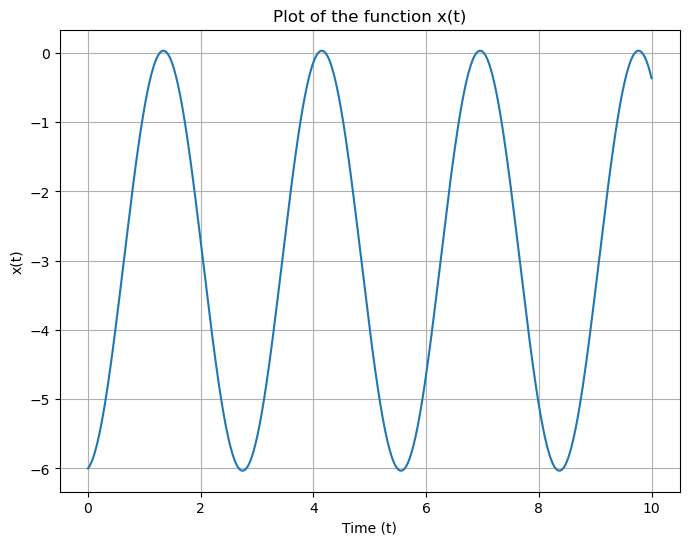

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time array
t = np.linspace(0, 10, 500)

# Define the function x(t)
x = -3*np.cos(np.sqrt(5)*t) + (1/np.sqrt(5))*np.sin(np.sqrt(5)*t) - 3

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t, x)
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Plot of the function x(t)')
plt.grid(True)
plt.show()

It turns out that the **Superposition Principle** holds for nonhomogeneous equations as well. In particular, suppose $y_k$ is a particular solution to 

$$
a_n(x)y^{(n)}(x)+a_{n-1}y^{(n-1)}(x) + \dots + a_1(x)y'(x) + a_0(x)y(x)=f_k(x).
$$ 

Then the linear combination $y(x)= y_1(x) + y_2(x) + \dots + y_n(x)$ is a particular solution to

$$
a_n(x)y^{(n)}(x)+a_{n-1}y^{(n-1)}(x) + \dots + a_1(x)y'(x) + a_0(x)y(x)=f_1(x)+f_2(x)+\dots+f_n(x).
$$

### Exercises

:::{admonition} Exercises
1. Find all solutions to $x''+x'-6x=0$.
    
2. Use your answer to 1 to find the general solution to the differential equation $x''+x'-6x=\sin(3t)$.

3. Use your answer to 1 to find the general solution to the differential equation $x''+x'-6x=5e^{4t}$.

4. Use your answer to 1 to find the general solution to the differential equation $x''+x'-6x=5e^{2t}$. Hint: Think about why changing the exponent from $4t$ to $2t$ adds an extra step to the problem.

5. Use your answer to 2 and 3 to find the general solution of the differential equation $x''+x'-6x = 5e^{4t}+\sin(3t)$. Hint: What does the Superposition Principle tell us?

6. Find the form of the particular solution of the following differential equations. Note you do not need to solve for the undetermined coefficients.
    - $x''-6x'+9x = 3t+10\cos(t)$
    - $x''-9x=te^{3t}$
    - $2x''+x'+4x = 3t^2\sin(2t)$
:::